In [12]:
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit import IBMQ

In [13]:
def GuessMyBinary(BinaryKey):
    length = len(BinaryKey)
    
    qc = QuantumCircuit(length+1, length)
    
    qc.h(range(length+1))
    
    qc.x(length)
    qc.h(length)
    
    for i in range(length):
        if BinaryKey[i] == '1':
            qc.cx(i, length)
            
    qc.h(range(length))
    
    qc.measure(range(length), range(length))
    
    return qc

Enter the secret Binary Key: 110101

Quantum Circuit:
     ┌───┐                     ┌───┐     ┌─┐                   
q_0: ┤ H ├──────────────────■──┤ H ├─────┤M├───────────────────
     ├───┤                  │  └───┘┌───┐└╥┘     ┌─┐           
q_1: ┤ H ├──────────────────┼────■──┤ H ├─╫──────┤M├───────────
     ├───┤┌───┐     ┌─┐     │    │  └───┘ ║      └╥┘           
q_2: ┤ H ├┤ H ├─────┤M├─────┼────┼────────╫───────╫────────────
     ├───┤└───┘     └╥┘     │    │        ║ ┌───┐ ║      ┌─┐   
q_3: ┤ H ├───────────╫──────┼────┼────■───╫─┤ H ├─╫──────┤M├───
     ├───┤┌───┐      ║ ┌─┐  │    │    │   ║ └───┘ ║      └╥┘   
q_4: ┤ H ├┤ H ├──────╫─┤M├──┼────┼────┼───╫───────╫───────╫────
     ├───┤└───┘      ║ └╥┘  │    │    │   ║       ║ ┌───┐ ║ ┌─┐
q_5: ┤ H ├───────────╫──╫───┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌───┐ ║  ║ ┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_6: ┤ H ├┤ X ├┤ H ├─╫──╫─┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║  ║ └───┘└───┘└───┘ ║ └───┘ 

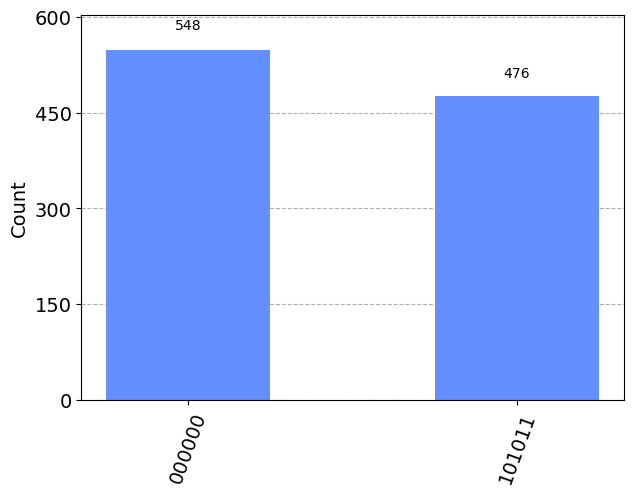

In [14]:
BinaryKey = input("Enter the secret Binary Key: ")

circuit = GuessMyBinary(BinaryKey)

print("\nQuantum Circuit:")
print(circuit)

simulator = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()

counts = result.get_counts(circuit)

print("\nMeasurement Outcomes:")
print(counts)

plot_histogram(counts)

In [15]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-12-15 18:17:35,721: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.load_account()
qcomp = provider.get_backend('ibm_brisbane')

ibmqfactory.load_account:WARNING:2023-12-15 18:17:51,087: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
job = execute(circuit, backend = qcomp)
from qiskit.tools.monitor import job_monitor

In [11]:
job_monitor(job)

Job Status: job has successfully run


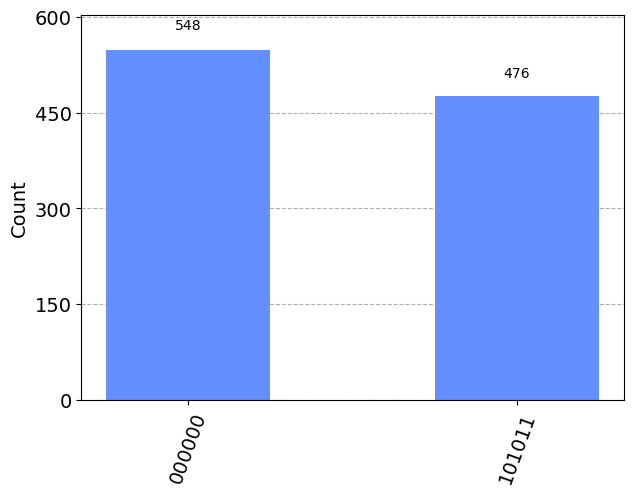

In [18]:
plot_histogram(result.get_counts(circuit))